# DATATHON CHALLENGE 1: NTT DATA

In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [169]:
data_file = 'consumo_material_clean.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(data_file)

# Separation of ORIGEN column into REGION, HOSPITAL and DEPARTAMENT ¡

df['REGION'] = df['ORIGEN'].str.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            split('-').str[0]
df['HOSPITAL'] = df['ORIGEN'].str.split('-').str[1]
df['DEPARTAMENT'] = df['ORIGEN'].str.split('-').str[2]
df = df.drop('ORIGEN', axis = 1)

df['FECHAPEDIDO'] = pd.to_datetime(df['FECHAPEDIDO'])

df.head()


,CODIGO,FECHAPEDIDO,NUMERO,REFERENCIA,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,TIPOCOMPRA,TGL,PRODUCTO,REGION,HOSPITAL,DEPARTAMENT
0,E99808,2023-01-01,1595724/23,178567.1,60,10,62.59,375.54,Compra menor,TRANSITO,APOSITO DE FIBRAS DE POLIACRILATO C/PLATA-3,1,2,60
1,B41691,2016-01-02,72714/16,400403,40,10,102.80,411.21,Compra menor,ALMACENABLE,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-16,0,10,1
2,E64543,2016-01-02,71961/16,403770,20,5,12.10,48.40,Compra menor,TRANSITO,APOSITO DE HIDROFIBRA / CINTA-18,0,4,111
3,E65007,2016-01-02,72773/16,20415,100,50,215.32,430.65,Concurso,ALMACENABLE,APOSITO DE ESPUMA POLIURETANO / SACRO-11,0,10,1
4,E64911,2017-01-02,86159/17,20701,300,300,792.00,792.00,Concurso,ALMACENABLE,APOSITO C/ CARBON Y PLATA-6,0,6,1


In [190]:
df_gp = df[['CODIGO', 'PRECIO', 'IMPORTELINEA', 'TIPOCOMPRA', 'PRODUCTO']].groupby(['CODIGO', 'TIPOCOMPRA', 'PRODUCTO']).mean().reset_index()


pivot_df = df_gp.pivot_table(index=['CODIGO', 'PRODUCTO'], columns='TIPOCOMPRA', values='PRECIO', fill_value= None)

In [191]:
merged_df = pd.merge(df, pivot_df, on='PRODUCTO', how='left')

merged_df['IMPORTELINEA_CONCURSO'] = ((merged_df['CANTIDADCOMPRA']/merged_df['UNIDADESCONSUMOCONTENIDAS']) * merged_df['Concurso'])
merged_df['IMPORTELINEA_MEDIA'] = ((merged_df['CANTIDADCOMPRA']/merged_df['UNIDADESCONSUMOCONTENIDAS']) * merged_df['Compra menor'])

merged_df['BEST_PRICE'] = np.where(merged_df['IMPORTELINEA_CONCURSO'] < merged_df['IMPORTELINEA'], merged_df['IMPORTELINEA_CONCURSO'], merged_df['IMPORTELINEA'])

merged_df['CONCURSO_BETTER'] = np.where(merged_df['IMPORTELINEA_CONCURSO'] < merged_df['IMPORTELINEA'], 1, 0)

total_actual = merged_df['IMPORTELINEA'].sum()
total_media = merged_df['IMPORTELINEA_MEDIA'].sum()
total_concurso = merged_df['IMPORTELINEA_CONCURSO'].sum()
total_ahorro = merged_df['CONCURSO_BETTER'].sum()
total_best_price = merged_df['BEST_PRICE'].sum()

print(f'El total actual es: {total_actual}')
print(f'El total con concurso es: {total_concurso}')
print(f'El total con media es: {total_media}')
print(f'El total con best price es: {total_best_price}')
print(f'El número de productos con los que ahorramos es: {total_ahorro} de {merged_df.shape[0]} productos') 
merged_df.head(5)


El total actual es: 8939587.297647
El total con concurso es: 15569650.807817448
El total con media es: 13154202.95907439
El total con best price es: 8252652.909278725
El número de productos con los que ahorramos es: 4909 de 15698 productos


,CODIGO,FECHAPEDIDO,NUMERO,REFERENCIA,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,TIPOCOMPRA,TGL,PRODUCTO,REGION,HOSPITAL,DEPARTAMENT,Compra menor,Concurso,IMPORTELINEA_CONCURSO,IMPORTELINEA_MEDIA,BEST_PRICE,CONCURSO_BETTER
0,E99808,2023-01-01,1595724/23,178567.1,60,10,62.59,375.54,Compra menor,TRANSITO,APOSITO DE FIBRAS DE POLIACRILATO C/PLATA-3,1,2,60,62.62,62.59,375.57,375.74,375.54,0
1,B41691,2016-01-02,72714/16,400403,40,10,102.80,411.21,Compra menor,ALMACENABLE,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-16,0,10,1,107.23,105.13,420.52,428.92,411.21,0
2,E64543,2016-01-02,71961/16,403770,20,5,12.10,48.40,Compra menor,TRANSITO,APOSITO DE HIDROFIBRA / CINTA-18,0,4,111,13.59,NaN,NaN,54.37,48.40,0
3,E65007,2016-01-02,72773/16,20415,100,50,215.32,430.65,Concurso,ALMACENABLE,APOSITO DE ESPUMA POLIURETANO / SACRO-11,0,10,1,218.23,215.32,430.65,436.47,430.65,0
4,E64911,2017-01-02,86159/17,20701,300,300,792.00,792.00,Concurso,ALMACENABLE,APOSITO C/ CARBON Y PLATA-6,0,6,1,792.00,779.85,779.85,792.00,779.85,1


In [193]:
df_gp = df[['CODIGO', 'PRECIO', 'IMPORTELINEA', 'TIPOCOMPRA', 'PRODUCTO', 'CANTIDADCOMPRA']].groupby(['CODIGO', 'TIPOCOMPRA', 'PRODUCTO', 'CANTIDADCOMPRA']).mean().reset_index()


pivot_df2 = df_gp.pivot_table(index=['CODIGO', 'PRODUCTO', 'CANTIDADCOMPRA'], columns='TIPOCOMPRA', values='IMPORTELINEA', fill_value= None)

res_df = pd.DataFrame(pivot_df2.apply(lambda row: row['Compra menor'] - row['Concurso'] if row['Concurso'] != 0 and row['Compra menor'] != 0 else None, axis=1))

pivot_df2.head(5)

TIPOCOMPRA                                                               Compra menor  \
CODIGO PRODUCTO                                          CANTIDADCOMPRA                 
B40558 GEL P/ LIMPIEZA  Y DESCONTAMINACION DE HERIDAS-15 1                       9.90   
                                                         2                      21.21   
                                                         3                      29.70   
                                                         4                      40.92   
                                                         5                      53.18   

TIPOCOMPRA                                                               Concurso  
CODIGO PRODUCTO                                          CANTIDADCOMPRA            
B40558 GEL P/ LIMPIEZA  Y DESCONTAMINACION DE HERIDAS-15 1                   9.89  
                                                         2                  19.78  
                                                         3                    NaN  
                                                         4                  39.56  
                                                         5                  49.44

In [194]:
# Taking into account different pricings for different quantities.

df_compare = pd.DataFrame(pivot_df2.to_records())
df_compare['Diferencia'] = df_compare['Concurso'] - df_compare['Compra menor']
df_compare['Ahorro'] = np.where(df_compare['Diferencia'] < 0, 1, 0)
total_ahorro = df_compare['Diferencia'].sum()
productos_ahorro = df_compare['Ahorro'].sum()

print(f'El total de ahorro es: {total_ahorro}')
print(f'El número de productos con los que ahorramos es: {productos_ahorro} de {df_compare.shape[0]} productos')

print('Número de productos sin datos de concurso', df_compare['Concurso'].isna().sum())

El total de ahorro es: -25478.239005919644
El número de productos con los que ahorramos es: 358 de 1191 productos
Número de productos sin datos de concurso 389


In [195]:
final_df = pd.merge(df, df_compare, on=['PRODUCTO', 'CANTIDADCOMPRA'], how='left')

total_price = final_df['IMPORTELINEA'].sum()
discounted_price = final_df['Diferencia'].sum()

print(f'El total actual es: {total_price}')
print(f'El total con concurso es: {discounted_price}')

final_df.head()

El total actual es: 8939587.297647
El total con concurso es: -391417.8170515016


,CODIGO_x,FECHAPEDIDO,NUMERO,REFERENCIA,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,TIPOCOMPRA,TGL,PRODUCTO,REGION,HOSPITAL,DEPARTAMENT,CODIGO_y,Compra menor,Concurso,Diferencia,Ahorro
0,E99808,2023-01-01,1595724/23,178567.1,60,10,62.59,375.54,Compra menor,TRANSITO,APOSITO DE FIBRAS DE POLIACRILATO C/PLATA-3,1,2,60,E99808,375.57,375.57,-0.00,1
1,B41691,2016-01-02,72714/16,400403,40,10,102.80,411.21,Compra menor,ALMACENABLE,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-16,0,10,1,B41691,412.93,412.75,-0.19,1
2,E64543,2016-01-02,71961/16,403770,20,5,12.10,48.40,Compra menor,TRANSITO,APOSITO DE HIDROFIBRA / CINTA-18,0,4,111,E64543,48.40,NaN,NaN,0
3,E65007,2016-01-02,72773/16,20415,100,50,215.32,430.65,Concurso,ALMACENABLE,APOSITO DE ESPUMA POLIURETANO / SACRO-11,0,10,1,E65007,437.19,430.65,-6.54,1
4,E64911,2017-01-02,86159/17,20701,300,300,792.00,792.00,Concurso,ALMACENABLE,APOSITO C/ CARBON Y PLATA-6,0,6,1,E64911,792.00,782.74,-9.26,1


In [127]:
# Using the mean for products. (doesn't take into account different pricings for quantities)

merged_df = pd.merge(df, pivot_df, on='PRODUCTO', how='left')

merged_df['BEST_PRICE'] = np.where((merged_df['Compra menor'] < merged_df['Concurso']) | merged_df['Concurso'].isna() , merged_df['Compra menor'], merged_df['Concurso'])
merged_df['CHANGED'] = np.where(merged_df['BEST_PRICE'] == merged_df['Compra menor'], 0, 1)


total_best = merged_df['BEST_PRICE'].sum()
total_concurso = merged_df['Concurso'].sum()
total_real = merged_df['IMPORTELINEA'].sum()

print(f'El total con concurso es: {total_concurso}')    # Hay unos 18 NaNs por eso sale tan barato.
print(f'El total con best price es: {total_best}')
print(f'El total real es: {total_real}')

print(f'Dinero ahorrado con best price: {total_real - total_best}')

merged_df.head()

El total con concurso es: 7917659.665209155
El total con best price es: 8518736.650886796
El total real es: 8939587.297647
Dinero ahorrado con best price: 420850.64676020294


,CODIGO,FECHAPEDIDO,NUMERO,REFERENCIA,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,TIPOCOMPRA,TGL,PRODUCTO,REGION,HOSPITAL,DEPARTAMENT,Compra menor,Concurso,BEST_PRICE,CHANGED
0,E99808,2023-01-01,1595724/23,178567.1,60,10,62.59,375.54,Compra menor,TRANSITO,APOSITO DE FIBRAS DE POLIACRILATO C/PLATA-3,1,2,60,274.31,287.44,274.31,0
1,B41691,2016-01-02,72714/16,400403,40,10,102.80,411.21,Compra menor,ALMACENABLE,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-16,0,10,1,880.81,1238.14,880.81,0
2,E64543,2016-01-02,71961/16,403770,20,5,12.10,48.40,Compra menor,TRANSITO,APOSITO DE HIDROFIBRA / CINTA-18,0,4,111,60.63,NaN,60.63,0
3,E65007,2016-01-02,72773/16,20415,100,50,215.32,430.65,Concurso,ALMACENABLE,APOSITO DE ESPUMA POLIURETANO / SACRO-11,0,10,1,387.43,538.31,387.43,0
4,E64911,2017-01-02,86159/17,20701,300,300,792.00,792.00,Concurso,ALMACENABLE,APOSITO C/ CARBON Y PLATA-6,0,6,1,1510.08,1355.66,1355.66,1


# Different visualizations of TIPOCOMPRA

<AxesSubplot: xlabel='FECHAPEDIDO', ylabel='Count'>

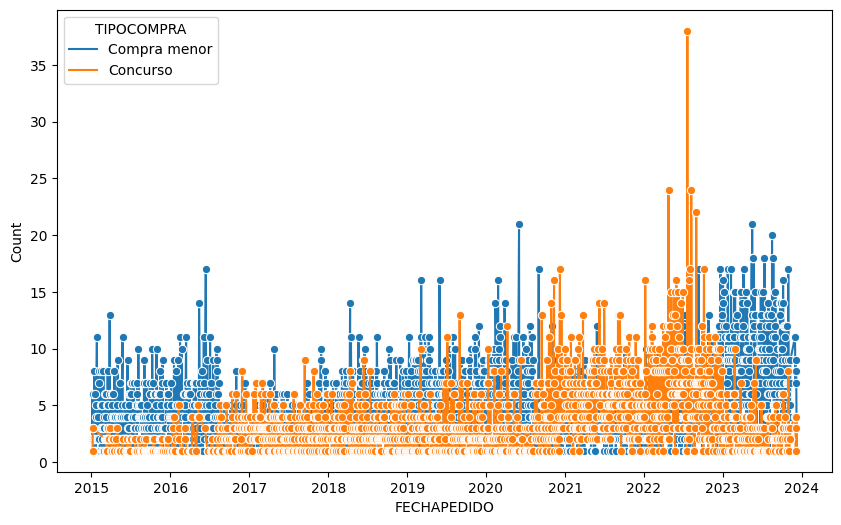

In [ ]:
grouped_df = df.groupby(['FECHAPEDIDO', 'TIPOCOMPRA']).size().reset_index(name='Count')

# Create a line plot
plt.figure(figsize=(10, 6))

# Plot lines for each 'TIPOCOMPRA'
sns.lineplot(x='FECHAPEDIDO', y='Count', hue='TIPOCOMPRA', data=grouped_df, marker='o')

<AxesSubplot: xlabel='HOSPITAL', ylabel='count'>

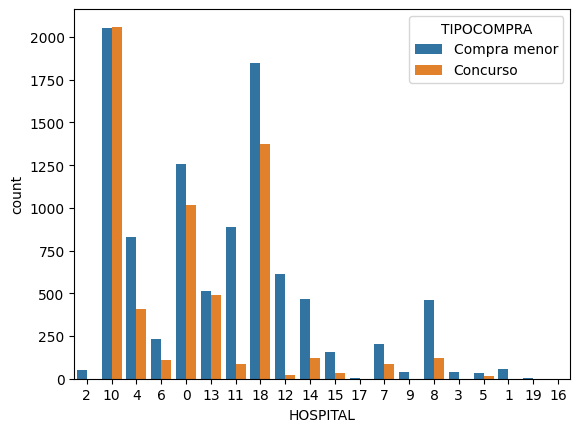

In [ ]:
# Count of each delivery differentiating by TIPOCOMPRA
sns.countplot(x='HOSPITAL', hue='TIPOCOMPRA', data=df)

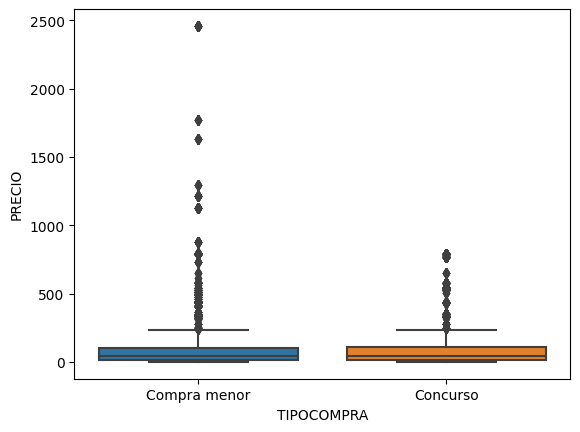

In [ ]:
sns.boxplot(x = 'TIPOCOMPRA', y='PRECIO', data=df)

# Show the plot
plt.show()

count    15698.000000
mean        83.185820
std        195.915475
min          1.000000
25%          5.000000
50%         10.000000
75%         50.000000
max       2000.000000
Name: UNIDADESCONSUMOCONTENIDAS, dtype: float64


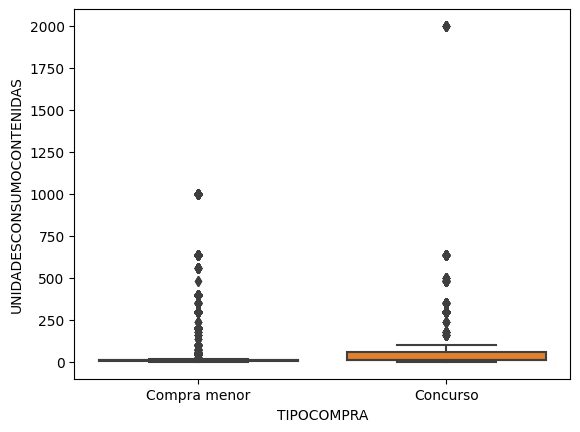

In [ ]:
sns.boxplot(x = 'TIPOCOMPRA', y='UNIDADESCONSUMOCONTENIDAS', data=df)

# Show the plot
print(df['UNIDADESCONSUMOCONTENIDAS'].describe())
plt.show()